In [1]:
import pandas as pd
import numpy as np
from glob import glob
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from utils.stats import friedman_with_posthoc
import matplotlib.patches as mpatches
import matplotlib.cm as cm

In [2]:
def plot_heatmap(corr_matrix, ax, idx_order, cmap='coolwarm', 
                           annot=True, fmt='.2f', title='Correlation Heatmap'):

    corr_matrix = corr_matrix.loc[idx_order, idx_order]
    
    # Create mask for upper triangle
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) 
    

    # For binary data, use a discrete colormap and specific settings
    #cmap = 'RdYlBu_r'  # Better for binary data
    #fmt = '.0f'  # No decimals for binary values
    vmin, vmax = 0, 1
    # cbar_kws = {
    #     'shrink': 0.8,
    #     'ticks': [0, 1],
    #     'label': 'Significance (0=No, 1=Yes)'
    # }
    
    # Generate heatmap
    sns.heatmap(corr_matrix, 
                mask=mask,
                annot=annot, 
                fmt=fmt,
                cmap=cmap,
                center=0.5,
                square=True,
                vmin=vmin,
                vmax=vmax,
                cbar=False,
                annot_kws={'size': 14},
                #cbar_kws=cbar_kws,
                ax=ax)
    
    # Set title
    ax.set_title(title, fontsize=16, pad=20)
    ax.tick_params(axis='both', which='major', labelsize=14)  # Tick labels
    
    # Adjust layout
    plt.tight_layout()


### Classification

In [3]:
results_cla = pd.read_csv('./stats/3_cv_scores_cla.csv')
results_cla

,cv_scores,freeze,target,metric,model
0,0.958420,Linear Probing,Pneumothorax,auroc,Ark+
1,0.965896,Linear Probing,Pneumothorax,auroc,Ark+
2,0.973558,Linear Probing,Pneumothorax,auroc,Ark+
3,0.963899,Linear Probing,Pneumothorax,auroc,Ark+
4,0.959490,Linear Probing,Pneumothorax,auroc,Ark+
...,...,...,...,...,...
335,0.875545,Fine-tuning,Cardiomegaly,auprc,SegFormer
336,0.880734,Fine-tuning,Cardiomegaly,auprc,SegFormer
337,0.866214,Fine-tuning,Cardiomegaly,auprc,SegFormer
338,0.871135,Fine-tuning,Cardiomegaly,auprc,SegFormer


In [4]:
results_cla.loc[results_cla.model == 'SegFormer', 'freeze'] = 'End-to-end'

In [5]:
results_cla

,cv_scores,freeze,target,metric,model
0,0.958420,Linear Probing,Pneumothorax,auroc,Ark+
1,0.965896,Linear Probing,Pneumothorax,auroc,Ark+
2,0.973558,Linear Probing,Pneumothorax,auroc,Ark+
3,0.963899,Linear Probing,Pneumothorax,auroc,Ark+
4,0.959490,Linear Probing,Pneumothorax,auroc,Ark+
...,...,...,...,...,...
335,0.875545,End-to-end,Cardiomegaly,auprc,SegFormer
336,0.880734,End-to-end,Cardiomegaly,auprc,SegFormer
337,0.866214,End-to-end,Cardiomegaly,auprc,SegFormer
338,0.871135,End-to-end,Cardiomegaly,auprc,SegFormer


In [6]:
def stats_tests(results, m, t, f):
    results_sub = results[(results.metric==m) & (results.target==t) & ((results.freeze==f) | (results.freeze=='End-to-end'))]
    results_sub['fold'] = [1,2,3,4,5]*int(len(results_sub)/5)
    posthoc = friedman_with_posthoc(results_sub, block_col='fold', treatment_col='model', score_col='cv_scores', alpha=0.05)
    return posthoc

/tmp/ipykernel_2273471/2549942666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_sub['fold'] = [1,2,3,4,5]*int(len(results_sub)/5)


Friedman Test statistic: 37.9200, p-value: 0.0000

Friedman test significant (p < 0.05). Performing Nemenyi post-hoc test...

Nemenyi Post-Hoc Test Results:
                      Ark+  BiomedCLIP  CheXagent    DINOv2  MedImageInsights  \
Ark+              1.000000    0.002791   0.965588  0.001076          0.999709   
BiomedCLIP        0.002791    1.000000   0.123891  1.000000          0.023034   
CheXagent         0.965588    0.123891   1.000000  0.066776          0.999709   
DINOv2            0.001076    1.000000   0.066776  1.000000          0.010395   
MedImageInsights  0.999709    0.023034   0.999709  0.010395          1.000000   
MedSigLIP         0.488170    0.650119   0.991695  0.488170          0.855494   
RAD-DINO          0.569454    0.569454   0.996668  0.409515          0.903592   
SegFormer         0.066776    0.991695   0.650119  0.965588          0.270180   
SigLIP2           0.002791    1.000000   0.123891  1.000000          0.023034   

                  MedSigLIP  RAD

/tmp/ipykernel_2273471/2549942666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_sub['fold'] = [1,2,3,4,5]*int(len(results_sub)/5)
/tmp/ipykernel_2273471/2549942666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_sub['fold'] = [1,2,3,4,5]*int(len(results_sub)/5)


Friedman Test statistic: 38.8267, p-value: 0.0000

Friedman test significant (p < 0.05). Performing Nemenyi post-hoc test...

Nemenyi Post-Hoc Test Results:
                      Ark+  BiomedCLIP  CheXagent    DINOv2  MedImageInsights  \
Ark+              1.000000    0.001746   0.996668  0.000391          0.991695   
BiomedCLIP        0.001746    1.000000   0.033429  0.999994          0.047673   
CheXagent         0.996668    0.033429   1.000000  0.010395          1.000000   
DINOv2            0.000391    0.999994   0.010395  1.000000          0.015603   
MedImageInsights  0.991695    0.047673   1.000000  0.015603          1.000000   
MedSigLIP         0.336197    0.726718   0.855494  0.488170          0.903592   
RAD-DINO          0.726718    0.336197   0.991695  0.163935          0.996668   
SegFormer         0.006813    0.999994   0.091822  0.998888          0.123891   
SigLIP2           0.091822    0.965588   0.488170  0.855494          0.569454   

                  MedSigLIP  RAD

/tmp/ipykernel_2273471/2549942666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_sub['fold'] = [1,2,3,4,5]*int(len(results_sub)/5)


Friedman Test statistic: 37.6000, p-value: 0.0000

Friedman test significant (p < 0.05). Performing Nemenyi post-hoc test...

Nemenyi Post-Hoc Test Results:
                      Ark+  BiomedCLIP  CheXagent    DINOv2  MedImageInsights  \
Ark+              1.000000    0.123891   1.000000  0.001746          0.999709   
BiomedCLIP        0.123891    1.000000   0.066776  0.940007          0.409515   
CheXagent         1.000000    0.066776   1.000000  0.000653          0.996668   
DINOv2            0.001746    0.940007   0.000653  1.000000          0.015603   
MedImageInsights  0.999709    0.409515   0.996668  0.015603          1.000000   
MedSigLIP         0.996668    0.569454   0.982079  0.033429          1.000000   
RAD-DINO          0.650119    0.991695   0.488170  0.409515          0.940007   
SegFormer         0.015603    0.998888   0.006813  0.999709          0.091822   
SigLIP2           0.336197    0.999946   0.212625  0.726718          0.726718   

                  MedSigLIP  RAD

/tmp/ipykernel_2273471/2228042243.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm')


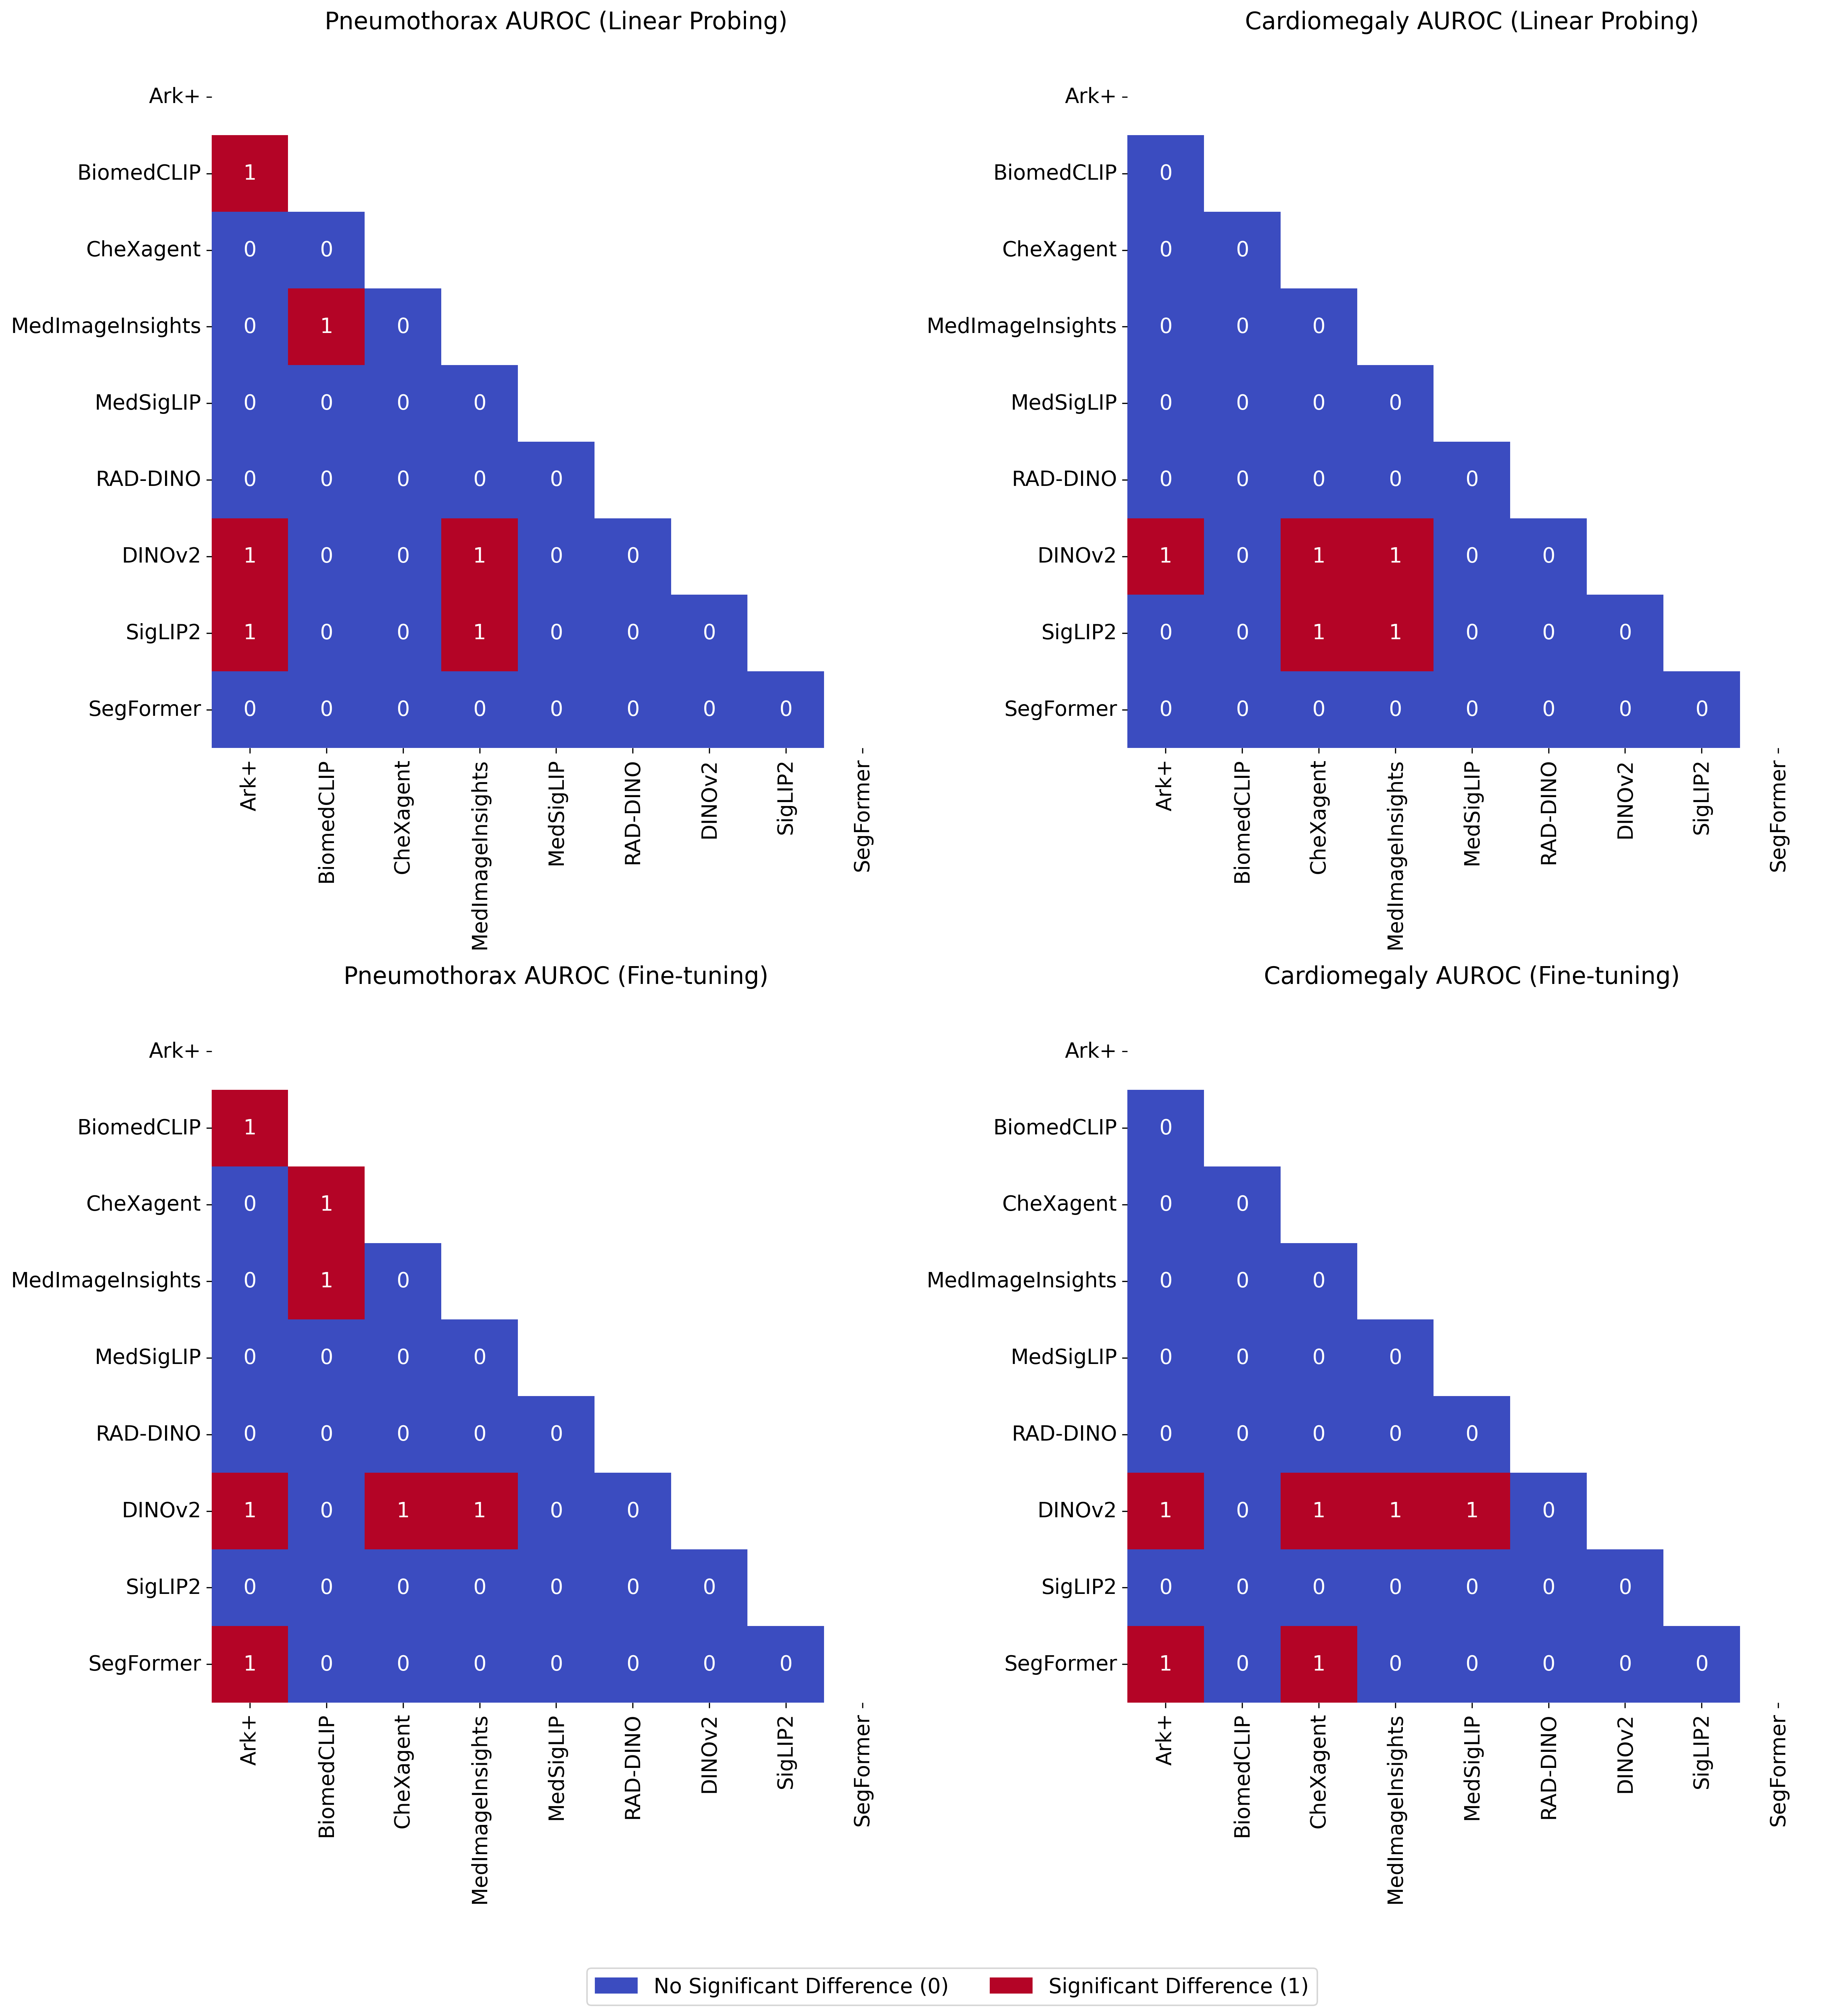

In [7]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 18), dpi=300)
idx_order = ['Ark+', 'BiomedCLIP', 'CheXagent', 'MedImageInsights', 'MedSigLIP', 'RAD-DINO', 'DINOv2', 'SigLIP2', 'SegFormer']

posthoc_ptx_cla_fz_auroc = stats_tests(results_cla, 'auroc', 'Pneumothorax', 'Linear Probing')
plot_heatmap(posthoc_ptx_cla_fz_auroc['nemenyi_results']<0.05, axes[0,0], idx_order, cmap='coolwarm', annot=True, fmt='.0f', title='Pneumothorax AUROC (Linear Probing)')

posthoc_ptx_cla_e2e_auroc = stats_tests(results_cla, 'auroc', 'Pneumothorax', 'Fine-tuning')
plot_heatmap(posthoc_ptx_cla_e2e_auroc['nemenyi_results']<0.05, axes[1,0], idx_order, cmap='coolwarm', annot=True, fmt='.0f', title='Pneumothorax AUROC (Fine-tuning)')

posthoc_cm_cla_fz_auroc = stats_tests(results_cla, 'auroc', 'Cardiomegaly', 'Linear Probing')
plot_heatmap(posthoc_cm_cla_fz_auroc['nemenyi_results']<0.05, axes[0,1], idx_order, cmap='coolwarm', annot=True, fmt='.0f', title='Cardiomegaly AUROC (Linear Probing)')

posthoc_cm_cla_e2e_auroc = stats_tests(results_cla, 'auroc', 'Cardiomegaly', 'Fine-tuning')
plot_heatmap(posthoc_cm_cla_e2e_auroc['nemenyi_results']<0.05, axes[1,1], idx_order, cmap='coolwarm', annot=True, fmt='.0f', title='Cardiomegaly AUROC (Fine-tuning)')

# Get colors from colormap
cmap = cm.get_cmap('coolwarm')
color_0 = cmap(0.0)  # Color for value 0
color_1 = cmap(1.0)  # Color for value 1

# Create custom legend patches
no_sig_patch = mpatches.Patch(color=color_0, label='No Significant Difference (0)')
sig_patch = mpatches.Patch(color=color_1, label='Significant Difference (1)')

# Add legend
fig.legend(handles=[no_sig_patch, sig_patch], 
          loc='lower center', 
          bbox_to_anchor=(0.5, -0.05),
          ncol=2,
          fontsize=14,
          frameon=True,
          fancybox=True,
          shadow=False)

plt.tight_layout()
plt.show()

/tmp/ipykernel_2273471/2549942666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_sub['fold'] = [1,2,3,4,5]*int(len(results_sub)/5)


Friedman Test statistic: 37.9200, p-value: 0.0000

Friedman test significant (p < 0.05). Performing Nemenyi post-hoc test...

Nemenyi Post-Hoc Test Results:
                      Ark+  BiomedCLIP  CheXagent    DINOv2  MedImageInsights  \
Ark+              1.000000    0.002791   0.965588  0.001076          0.999709   
BiomedCLIP        0.002791    1.000000   0.123891  1.000000          0.023034   
CheXagent         0.965588    0.123891   1.000000  0.066776          0.999709   
DINOv2            0.001076    1.000000   0.066776  1.000000          0.010395   
MedImageInsights  0.999709    0.023034   0.999709  0.010395          1.000000   
MedSigLIP         0.488170    0.650119   0.991695  0.488170          0.855494   
RAD-DINO          0.569454    0.569454   0.996668  0.409515          0.903592   
SegFormer         0.066776    0.991695   0.650119  0.965588          0.270180   
SigLIP2           0.002791    1.000000   0.123891  1.000000          0.023034   

                  MedSigLIP  RAD

/tmp/ipykernel_2273471/2549942666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_sub['fold'] = [1,2,3,4,5]*int(len(results_sub)/5)
/tmp/ipykernel_2273471/2549942666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_sub['fold'] = [1,2,3,4,5]*int(len(results_sub)/5)


Friedman Test statistic: 38.8267, p-value: 0.0000

Friedman test significant (p < 0.05). Performing Nemenyi post-hoc test...

Nemenyi Post-Hoc Test Results:
                      Ark+  BiomedCLIP  CheXagent    DINOv2  MedImageInsights  \
Ark+              1.000000    0.001746   0.996668  0.000391          0.991695   
BiomedCLIP        0.001746    1.000000   0.033429  0.999994          0.047673   
CheXagent         0.996668    0.033429   1.000000  0.010395          1.000000   
DINOv2            0.000391    0.999994   0.010395  1.000000          0.015603   
MedImageInsights  0.991695    0.047673   1.000000  0.015603          1.000000   
MedSigLIP         0.336197    0.726718   0.855494  0.488170          0.903592   
RAD-DINO          0.726718    0.336197   0.991695  0.163935          0.996668   
SegFormer         0.006813    0.999994   0.091822  0.998888          0.123891   
SigLIP2           0.091822    0.965588   0.488170  0.855494          0.569454   

                  MedSigLIP  RAD

/tmp/ipykernel_2273471/2549942666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_sub['fold'] = [1,2,3,4,5]*int(len(results_sub)/5)


Friedman Test statistic: 37.6000, p-value: 0.0000

Friedman test significant (p < 0.05). Performing Nemenyi post-hoc test...

Nemenyi Post-Hoc Test Results:
                      Ark+  BiomedCLIP  CheXagent    DINOv2  MedImageInsights  \
Ark+              1.000000    0.123891   1.000000  0.001746          0.999709   
BiomedCLIP        0.123891    1.000000   0.066776  0.940007          0.409515   
CheXagent         1.000000    0.066776   1.000000  0.000653          0.996668   
DINOv2            0.001746    0.940007   0.000653  1.000000          0.015603   
MedImageInsights  0.999709    0.409515   0.996668  0.015603          1.000000   
MedSigLIP         0.996668    0.569454   0.982079  0.033429          1.000000   
RAD-DINO          0.650119    0.991695   0.488170  0.409515          0.940007   
SegFormer         0.015603    0.998888   0.006813  0.999709          0.091822   
SigLIP2           0.336197    0.999946   0.212625  0.726718          0.726718   

                  MedSigLIP  RAD

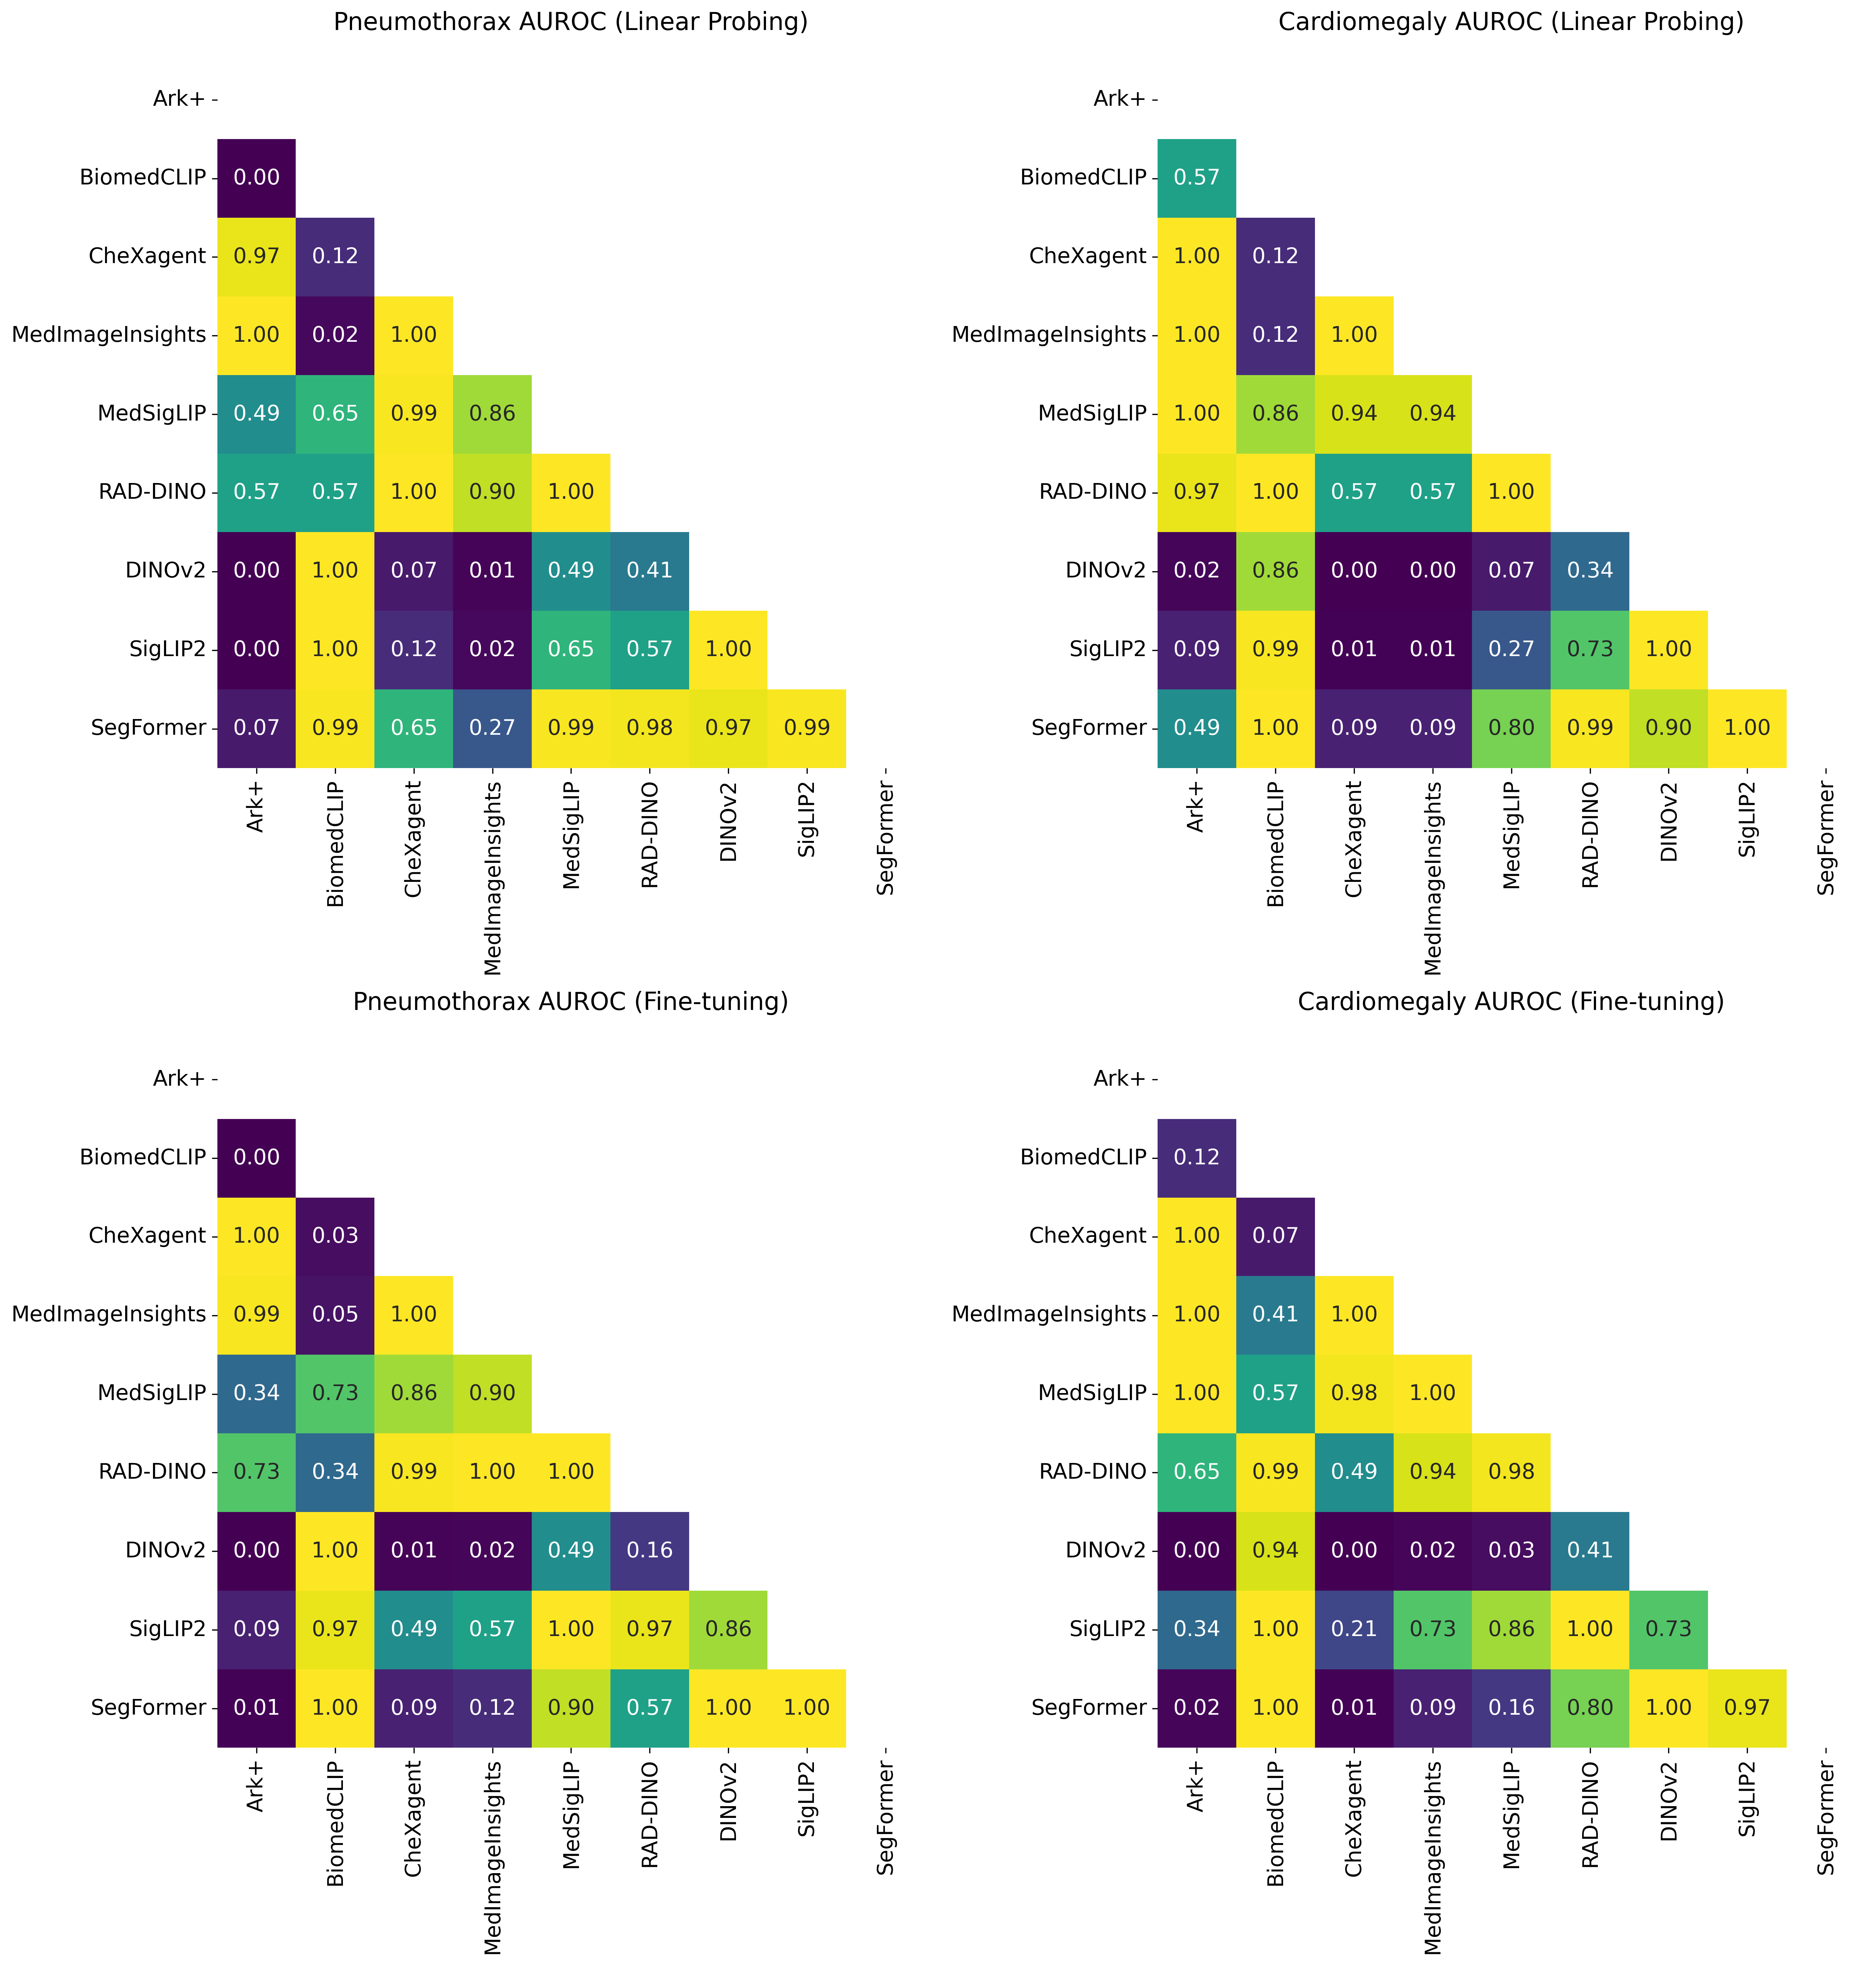

In [8]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 18), dpi=300)
idx_order = ['Ark+', 'BiomedCLIP', 'CheXagent', 'MedImageInsights', 'MedSigLIP', 'RAD-DINO', 'DINOv2', 'SigLIP2', 'SegFormer']

posthoc_ptx_cla_fz_auroc = stats_tests(results_cla, 'auroc', 'Pneumothorax', 'Linear Probing')
plot_heatmap(posthoc_ptx_cla_fz_auroc['nemenyi_results'], axes[0,0], idx_order, cmap='viridis', annot=True, fmt='.2f', title='Pneumothorax AUROC (Linear Probing)')

posthoc_ptx_cla_e2e_auroc = stats_tests(results_cla, 'auroc', 'Pneumothorax', 'Fine-tuning')
plot_heatmap(posthoc_ptx_cla_e2e_auroc['nemenyi_results'], axes[1,0], idx_order, cmap='viridis', annot=True, fmt='.2f', title='Pneumothorax AUROC (Fine-tuning)')

posthoc_cm_cla_fz_auroc = stats_tests(results_cla, 'auroc', 'Cardiomegaly', 'Linear Probing')
plot_heatmap(posthoc_cm_cla_fz_auroc['nemenyi_results'], axes[0,1], idx_order, cmap='viridis', annot=True, fmt='.2f', title='Cardiomegaly AUROC (Linear Probing)')

posthoc_cm_cla_e2e_auroc = stats_tests(results_cla, 'auroc', 'Cardiomegaly', 'Fine-tuning')
plot_heatmap(posthoc_cm_cla_e2e_auroc['nemenyi_results'], axes[1,1], idx_order, cmap='viridis', annot=True, fmt='.2f', title='Cardiomegaly AUROC (Fine-tuning)')

plt.tight_layout()
plt.show()

### Segmentation

In [9]:
results_seg = pd.read_csv('./stats/3_cv_scores_seg.csv')
results_seg

,cv_scores,freeze,target,metric,model
0,0.433102,Linear Probing,Pneumothorax,dice,Ark+(16)
1,0.422636,Linear Probing,Pneumothorax,dice,Ark+(16)
2,0.441792,Linear Probing,Pneumothorax,dice,Ark+(16)
3,0.420696,Linear Probing,Pneumothorax,dice,Ark+(16)
4,0.432959,Linear Probing,Pneumothorax,dice,Ark+(16)
...,...,...,...,...,...
335,0.923907,Fine-tuning,Heart,iou,SegFormer
336,0.926169,Fine-tuning,Heart,iou,SegFormer
337,0.926404,Fine-tuning,Heart,iou,SegFormer
338,0.927589,Fine-tuning,Heart,iou,SegFormer


In [10]:
results_seg.loc[results_seg.model == 'SegFormer', 'freeze'] = 'End-to-end'

/tmp/ipykernel_2273471/2549942666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_sub['fold'] = [1,2,3,4,5]*int(len(results_sub)/5)


Friedman Test statistic: 40.0000, p-value: 0.0000

Friedman test significant (p < 0.05). Performing Nemenyi post-hoc test...

Nemenyi Post-Hoc Test Results:
                      Ark+(16)  BiomedCLIP  CheXagent    DINOv2  \
Ark+(16)              1.000000    0.001746   0.726718  0.015603   
BiomedCLIP            0.001746    1.000000   0.336197  0.999709   
CheXagent             0.726718    0.336197   1.000000  0.726718   
DINOv2                0.015603    0.999709   0.726718  1.000000   
MedImageInsights(16)  0.965588    0.091822   0.999709  0.336197   
MedSigLIP             0.336197    0.726718   0.999709  0.965588   
RAD-DINO              0.999709    0.015603   0.965588  0.091822   
SegFormer             0.999709    0.000134   0.336197  0.001746   
SigLIP2               0.091822    0.965588   0.965588  0.999709   

                      MedImageInsights(16)  MedSigLIP  RAD-DINO  SegFormer  \
Ark+(16)                          0.965588   0.336197  0.999709   0.999709   
BiomedCLIP      

/tmp/ipykernel_2273471/2549942666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_sub['fold'] = [1,2,3,4,5]*int(len(results_sub)/5)
/tmp/ipykernel_2273471/2549942666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_sub['fold'] = [1,2,3,4,5]*int(len(results_sub)/5)


Friedman Test statistic: 38.7200, p-value: 0.0000

Friedman test significant (p < 0.05). Performing Nemenyi post-hoc test...

Nemenyi Post-Hoc Test Results:
                      Ark+(16)  BiomedCLIP  CheXagent    DINOv2  \
Ark+(16)              1.000000    0.212625   1.000000  0.569454   
BiomedCLIP            0.212625    1.000000   0.270180  0.999709   
CheXagent             1.000000    0.270180   1.000000  0.650119   
DINOv2                0.569454    0.999709   0.650119  1.000000   
MedImageInsights(16)  0.726718    0.000653   0.650119  0.006813   
MedSigLIP             0.903592    0.965588   0.940007  0.999709   
RAD-DINO              0.991695    0.015603   0.982079  0.091822   
SegFormer             0.650119    0.000391   0.569454  0.004395   
SigLIP2               0.999709    0.569454   0.999946  0.903592   

                      MedImageInsights(16)  MedSigLIP  RAD-DINO  SegFormer  \
Ark+(16)                          0.726718   0.903592  0.991695   0.650119   
BiomedCLIP      

/tmp/ipykernel_2273471/2549942666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_sub['fold'] = [1,2,3,4,5]*int(len(results_sub)/5)


Friedman Test statistic: 39.0933, p-value: 0.0000

Friedman test significant (p < 0.05). Performing Nemenyi post-hoc test...

Nemenyi Post-Hoc Test Results:
                      Ark+(16)  BiomedCLIP  CheXagent    DINOv2  \
Ark+(16)              1.000000    0.999709   0.409515  0.855494   
BiomedCLIP            0.999709    1.000000   0.796027  0.991695   
CheXagent             0.409515    0.796027   1.000000  0.998888   
DINOv2                0.855494    0.991695   0.998888  1.000000   
MedImageInsights(16)  0.001746    0.015603   0.650119  0.212625   
MedSigLIP             0.855494    0.991695   0.998888  1.000000   
RAD-DINO              0.066776    0.270180   0.996668  0.855494   
SegFormer             0.000134    0.001746   0.270180  0.047673   
SigLIP2               0.023034    0.123891   0.965588  0.650119   

                      MedImageInsights(16)  MedSigLIP  RAD-DINO  SegFormer  \
Ark+(16)                          0.001746   0.855494  0.066776   0.000134   
BiomedCLIP      

/tmp/ipykernel_2273471/562093577.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm')


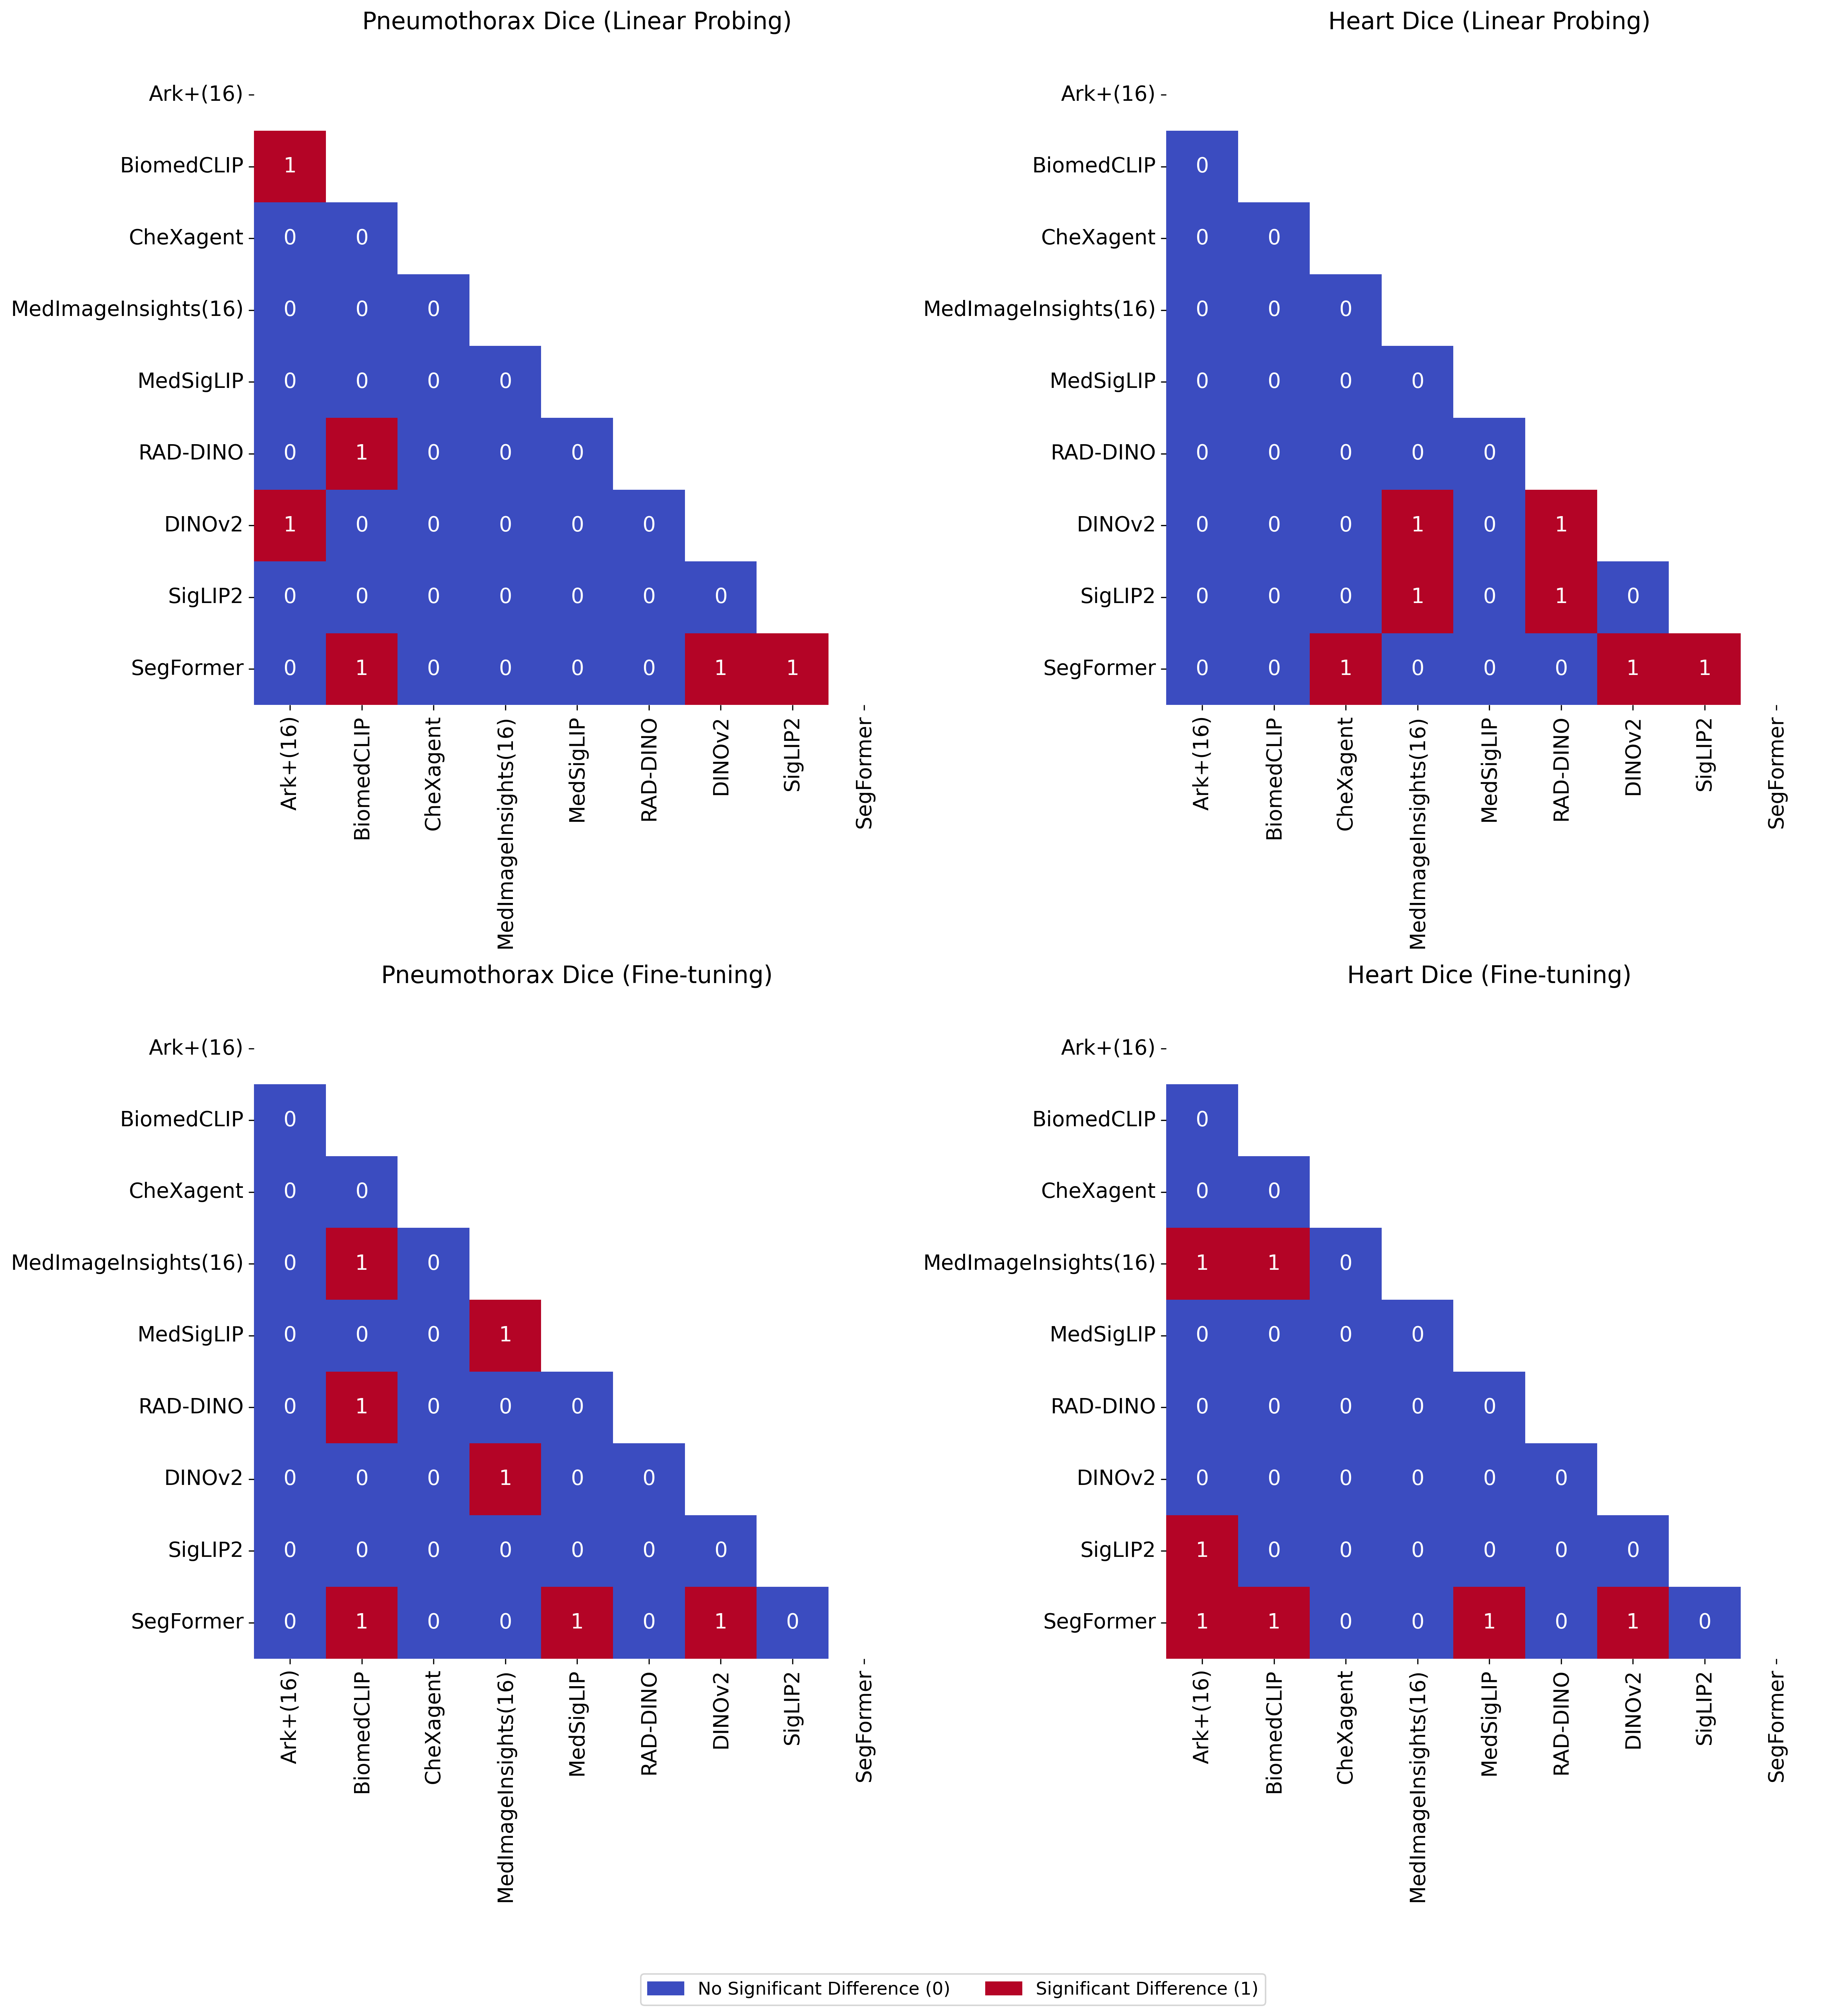

In [11]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 18), dpi=300)
idx_order = ['Ark+(16)', 'BiomedCLIP', 'CheXagent', 'MedImageInsights(16)', 'MedSigLIP', 'RAD-DINO', 'DINOv2', 'SigLIP2', 'SegFormer']

posthoc_ptx_seg_fz_auroc = stats_tests(results_seg, 'dice', 'Pneumothorax', 'Linear Probing')
plot_heatmap(posthoc_ptx_seg_fz_auroc['nemenyi_results']<0.05, axes[0,0], idx_order, cmap='coolwarm', annot=True, fmt='.0f', title='Pneumothorax Dice (Linear Probing)')

posthoc_ptx_seg_e2e_auroc = stats_tests(results_seg, 'dice', 'Pneumothorax', 'Fine-tuning')
plot_heatmap(posthoc_ptx_seg_e2e_auroc['nemenyi_results']<0.05, axes[1,0], idx_order, cmap='coolwarm', annot=True, fmt='.0f', title='Pneumothorax Dice (Fine-tuning)')

posthoc_cm_seg_fz_auroc = stats_tests(results_seg, 'dice', 'Heart', 'Linear Probing')
plot_heatmap(posthoc_cm_seg_fz_auroc['nemenyi_results']<0.05, axes[0,1], idx_order, cmap='coolwarm', annot=True, fmt='.0f', title='Heart Dice (Linear Probing)')

posthoc_cm_seg_e2e_auroc = stats_tests(results_seg, 'dice', 'Heart', 'Fine-tuning')
plot_heatmap(posthoc_cm_seg_e2e_auroc['nemenyi_results']<0.05, axes[1,1], idx_order, cmap='coolwarm', annot=True, fmt='.0f', title='Heart Dice (Fine-tuning)')

# Get colors from your colormap
cmap = cm.get_cmap('coolwarm')
color_0 = cmap(0.0)  # Color for value 0
color_1 = cmap(1.0)  # Color for value 1

# Create custom legend patches
no_sig_patch = mpatches.Patch(color=color_0, label='No Significant Difference (0)')
sig_patch = mpatches.Patch(color=color_1, label='Significant Difference (1)')

# Add legend
fig.legend(handles=[no_sig_patch, sig_patch], 
          loc='lower center', 
          bbox_to_anchor=(0.5, -0.05),
          ncol=2,
          fontsize=12,
          frameon=True,
          fancybox=True,
          shadow=False)

plt.tight_layout()
plt.show()

/tmp/ipykernel_2273471/2549942666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_sub['fold'] = [1,2,3,4,5]*int(len(results_sub)/5)


Friedman Test statistic: 40.0000, p-value: 0.0000

Friedman test significant (p < 0.05). Performing Nemenyi post-hoc test...

Nemenyi Post-Hoc Test Results:
                      Ark+(16)  BiomedCLIP  CheXagent    DINOv2  \
Ark+(16)              1.000000    0.001746   0.726718  0.015603   
BiomedCLIP            0.001746    1.000000   0.336197  0.999709   
CheXagent             0.726718    0.336197   1.000000  0.726718   
DINOv2                0.015603    0.999709   0.726718  1.000000   
MedImageInsights(16)  0.965588    0.091822   0.999709  0.336197   
MedSigLIP             0.336197    0.726718   0.999709  0.965588   
RAD-DINO              0.999709    0.015603   0.965588  0.091822   
SegFormer             0.999709    0.000134   0.336197  0.001746   
SigLIP2               0.091822    0.965588   0.965588  0.999709   

                      MedImageInsights(16)  MedSigLIP  RAD-DINO  SegFormer  \
Ark+(16)                          0.965588   0.336197  0.999709   0.999709   
BiomedCLIP      

/tmp/ipykernel_2273471/2549942666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_sub['fold'] = [1,2,3,4,5]*int(len(results_sub)/5)
/tmp/ipykernel_2273471/2549942666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_sub['fold'] = [1,2,3,4,5]*int(len(results_sub)/5)


Friedman Test statistic: 38.7200, p-value: 0.0000

Friedman test significant (p < 0.05). Performing Nemenyi post-hoc test...

Nemenyi Post-Hoc Test Results:
                      Ark+(16)  BiomedCLIP  CheXagent    DINOv2  \
Ark+(16)              1.000000    0.212625   1.000000  0.569454   
BiomedCLIP            0.212625    1.000000   0.270180  0.999709   
CheXagent             1.000000    0.270180   1.000000  0.650119   
DINOv2                0.569454    0.999709   0.650119  1.000000   
MedImageInsights(16)  0.726718    0.000653   0.650119  0.006813   
MedSigLIP             0.903592    0.965588   0.940007  0.999709   
RAD-DINO              0.991695    0.015603   0.982079  0.091822   
SegFormer             0.650119    0.000391   0.569454  0.004395   
SigLIP2               0.999709    0.569454   0.999946  0.903592   

                      MedImageInsights(16)  MedSigLIP  RAD-DINO  SegFormer  \
Ark+(16)                          0.726718   0.903592  0.991695   0.650119   
BiomedCLIP      

/tmp/ipykernel_2273471/2549942666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_sub['fold'] = [1,2,3,4,5]*int(len(results_sub)/5)


Friedman Test statistic: 39.0933, p-value: 0.0000

Friedman test significant (p < 0.05). Performing Nemenyi post-hoc test...

Nemenyi Post-Hoc Test Results:
                      Ark+(16)  BiomedCLIP  CheXagent    DINOv2  \
Ark+(16)              1.000000    0.999709   0.409515  0.855494   
BiomedCLIP            0.999709    1.000000   0.796027  0.991695   
CheXagent             0.409515    0.796027   1.000000  0.998888   
DINOv2                0.855494    0.991695   0.998888  1.000000   
MedImageInsights(16)  0.001746    0.015603   0.650119  0.212625   
MedSigLIP             0.855494    0.991695   0.998888  1.000000   
RAD-DINO              0.066776    0.270180   0.996668  0.855494   
SegFormer             0.000134    0.001746   0.270180  0.047673   
SigLIP2               0.023034    0.123891   0.965588  0.650119   

                      MedImageInsights(16)  MedSigLIP  RAD-DINO  SegFormer  \
Ark+(16)                          0.001746   0.855494  0.066776   0.000134   
BiomedCLIP      

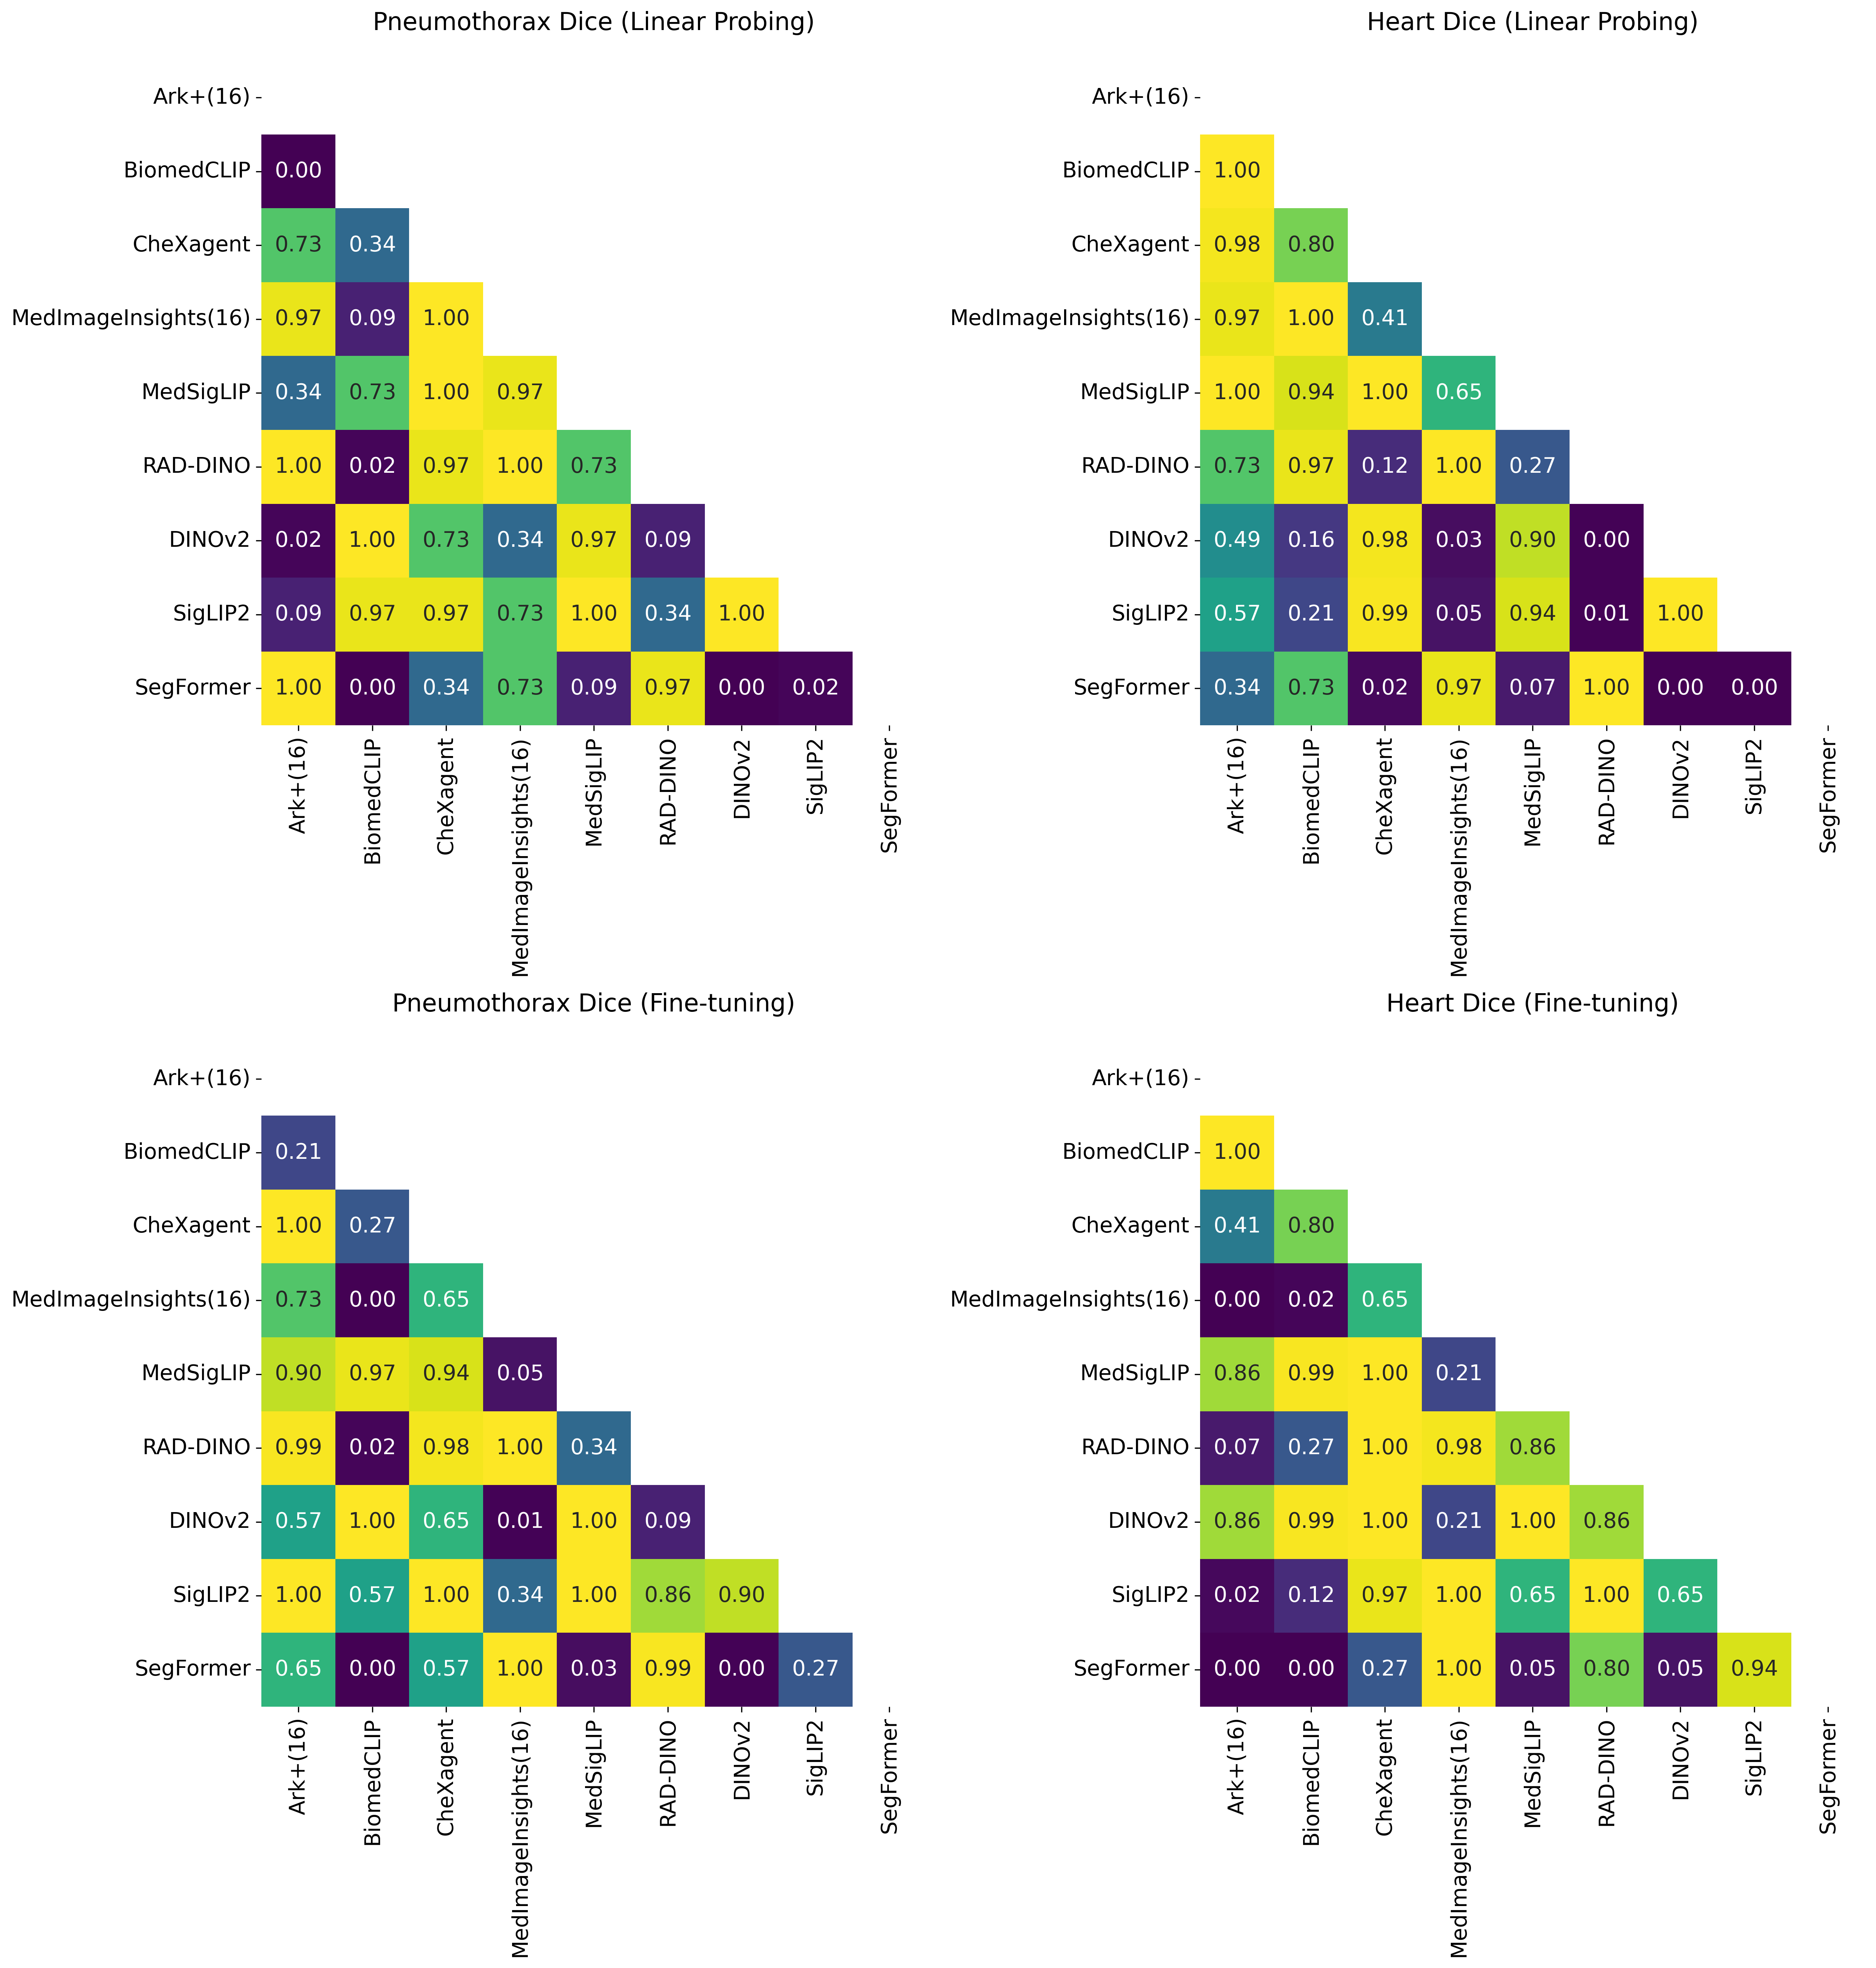

In [12]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 18), dpi=300)
idx_order = ['Ark+(16)', 'BiomedCLIP', 'CheXagent', 'MedImageInsights(16)', 'MedSigLIP', 'RAD-DINO', 'DINOv2', 'SigLIP2', 'SegFormer']

posthoc_ptx_seg_fz_auroc = stats_tests(results_seg, 'dice', 'Pneumothorax', 'Linear Probing')
plot_heatmap(posthoc_ptx_seg_fz_auroc['nemenyi_results'], axes[0,0], idx_order, cmap='viridis', annot=True, fmt='.2f', title='Pneumothorax Dice (Linear Probing)')

posthoc_ptx_seg_e2e_auroc = stats_tests(results_seg, 'dice', 'Pneumothorax', 'Fine-tuning')
plot_heatmap(posthoc_ptx_seg_e2e_auroc['nemenyi_results'], axes[1,0], idx_order, cmap='viridis', annot=True, fmt='.2f', title='Pneumothorax Dice (Fine-tuning)')

posthoc_cm_seg_fz_auroc = stats_tests(results_seg, 'dice', 'Heart', 'Linear Probing')
plot_heatmap(posthoc_cm_seg_fz_auroc['nemenyi_results'], axes[0,1], idx_order, cmap='viridis', annot=True, fmt='.2f', title='Heart Dice (Linear Probing)')

posthoc_cm_seg_e2e_auroc = stats_tests(results_seg, 'dice', 'Heart', 'Fine-tuning')
plot_heatmap(posthoc_cm_seg_e2e_auroc['nemenyi_results'], axes[1,1], idx_order, cmap='viridis', annot=True, fmt='.2f', title='Heart Dice (Fine-tuning)')

plt.tight_layout()
plt.show()

### effect of fine tuning

In [13]:
import pingouin as pg

def stats_tests2(results, m, t, M):
    results_sub = results[(results.metric==m) & (results.target==t) & (results.model==M)]
    #x = results_sub[results_sub.freeze=='Linear Probing'].loc[:,'cv_scores']
    #y = results_sub[results_sub.freeze=='Fine-tuning'].loc[:,'cv_scores']
    comp = pg.friedman(data=results_sub, dv='cv_scores', within="freeze", subject="fold") #pg.wilcoxon(x, y, alternative='two-sided')
    comp.index = [M]
    comp['target'] = t 
    return comp

In [14]:
results_seg['fold'] = [0,1,2,3,4]*(len(results_seg)//5)

#### segmentation

In [15]:
models = ['Ark+(16)', 'BiomedCLIP', 'CheXagent', 'MedImageInsights(16)', 'MedSigLIP', 'RAD-DINO', 'DINOv2', 'SigLIP2']
tasks = ['Pneumothorax', 'Heart']

paired_test_results = []
for t in tasks:
    for M in models:    
        comp = stats_tests2(results_seg, 'dice', t, M)
        paired_test_results.append(comp)

In [18]:
stats_finetune = pd.concat(paired_test_results, axis=0)
stats_finetune = stats_finetune.reset_index(names=['Model'])
stats_finetune = stats_finetune.rename(columns={'target':'Condition'})

seg_avg_ci = pd.read_csv('./stats/3_dice_comparison_seg.csv')
seg_avg_ci = seg_avg_ci.merge(stats_finetune[['Model','p-unc','Condition']], on=['Model','Condition'], how='left')
seg_avg_ci['Significance'] = seg_avg_ci['p-unc']<0.05
seg_avg_ci

,Condition,Model,Central_Measure,Linear Probing,Linear Probing_median,Linear Probing_CI_Lower,Linear Probing_CI_Upper,Fine-tuning,Fine-tuning_median,Fine-tuning_CI_Lower,Fine-tuning_CI_Upper,p-unc,Significance
0,Pneumothorax,Ark+(16),median,0.433 (0.421-0.442),0.432959,0.420696,0.441792,0.434 (0.428-0.441),0.434112,0.428383,0.441249,0.179712,False
1,Pneumothorax,BiomedCLIP,median,0.219 (0.218-0.231),0.219014,0.217861,0.230665,0.254 (0.243-0.267),0.253506,0.242702,0.267372,0.025347,True
2,Pneumothorax,CheXagent,median,0.388 (0.384-0.401),0.388201,0.384013,0.401037,0.435 (0.424-0.449),0.434827,0.423834,0.449368,0.025347,True
3,Pneumothorax,MedImageInsights(16),median,0.409 (0.399-0.415),0.408544,0.399147,0.414588,0.476 (0.460-0.492),0.475763,0.460243,0.492075,0.025347,True
4,Pneumothorax,MedSigLIP,median,0.316 (0.305-0.326),0.316053,0.305499,0.326342,0.405 (0.399-0.417),0.404681,0.398755,0.416978,0.025347,True
5,Pneumothorax,RAD-DINO,median,0.410 (0.406-0.424),0.410297,0.405516,0.423848,0.452 (0.449-0.466),0.451961,0.448791,0.465669,0.025347,True
6,Pneumothorax,DINOv2,median,0.242 (0.232-0.256),0.241629,0.231756,0.256139,0.321 (0.315-0.338),0.321034,0.314574,0.337869,0.025347,True
7,Pneumothorax,SigLIP2,median,0.308 (0.299-0.320),0.308345,0.298697,0.320103,0.426 (0.404-0.441),0.426257,0.403872,0.440658,0.025347,True
8,Pneumothorax,SegFormer,median,nan (nan-nan),NaN,NaN,NaN,0.478 (0.466-0.487),0.477742,0.465719,0.486759,NaN,False
9,Heart,Ark+(16),median,0.909 (0.908-0.910),0.908791,0.907629,0.909694,0.908 (0.907-0.909),0.908373,0.907016,0.909088,0.025347,True


In [19]:
seg_avg_ci.to_csv('./stats/5_0_segmentation_finetuning.csv', index=False)

#### classification

In [20]:
models = ['Ark+', 'BiomedCLIP', 'CheXagent', 'MedImageInsights', 'MedSigLIP', 'RAD-DINO', 'DINOv2', 'SigLIP2']
tasks = ['Pneumothorax', 'Cardiomegaly']
results_cla['fold'] = [0,1,2,3,4]*(len(results_cla)//5)

paired_test_results = []

for t in tasks:
    for M in models:
        comp = stats_tests2(results_cla, 'auroc', t, M)
        paired_test_results.append(comp)

In [21]:
stats_finetune = pd.concat(paired_test_results, axis=0)
stats_finetune = stats_finetune.reset_index(names=['Model'])
stats_finetune = stats_finetune.rename(columns={'target':'Condition'})

cla_avg_ci = pd.read_csv('./stats/3_auroc_comparison_cla.csv')
cla_avg_ci = cla_avg_ci.merge(stats_finetune[['Model','p-unc','Condition']], on=['Model','Condition'], how='left')
cla_avg_ci['Significance'] = cla_avg_ci['p-unc']<0.05
cla_avg_ci

,Condition,Model,Central_Measure,Linear Probing,Linear Probing_median,Linear Probing_CI_Lower,Linear Probing_CI_Upper,Fine-tuning,Fine-tuning_median,Fine-tuning_CI_Lower,Fine-tuning_CI_Upper,p-unc,Significance
0,Pneumothorax,Ark+,median,0.964 (0.958-0.974),0.963899,0.958420,0.973558,0.965 (0.961-0.972),0.965407,0.960535,0.972264,0.654721,False
1,Pneumothorax,BiomedCLIP,median,0.877 (0.862-0.881),0.877406,0.861739,0.881443,0.879 (0.869-0.891),0.879003,0.868642,0.891431,0.025347,True
2,Pneumothorax,CheXagent,median,0.954 (0.947-0.965),0.953571,0.946632,0.965379,0.958 (0.950-0.964),0.957650,0.949989,0.964011,0.179712,False
3,Pneumothorax,MedImageInsights,median,0.958 (0.954-0.966),0.957782,0.953771,0.966033,0.959 (0.955-0.961),0.959253,0.954965,0.961471,0.654721,False
4,Pneumothorax,MedSigLIP,median,0.913 (0.908-0.930),0.912925,0.908480,0.930220,0.916 (0.906-0.932),0.915553,0.905666,0.931889,0.654721,False
5,Pneumothorax,RAD-DINO,median,0.915 (0.908-0.930),0.915223,0.907969,0.929832,0.924 (0.914-0.936),0.923747,0.914442,0.935532,0.025347,True
6,Pneumothorax,DINOv2,median,0.870 (0.849-0.881),0.869523,0.848982,0.880581,0.869 (0.866-0.901),0.868644,0.866322,0.901164,0.654721,False
7,Pneumothorax,SigLIP2,median,0.871 (0.855-0.880),0.870859,0.855189,0.879588,0.895 (0.890-0.911),0.894810,0.890211,0.910834,0.025347,True
8,Pneumothorax,SegFormer,median,nan (nan-nan),NaN,NaN,NaN,0.887 (0.863-0.910),0.886518,0.862593,0.910216,NaN,False
9,Cardiomegaly,Ark+,median,0.939 (0.934-0.945),0.939457,0.934332,0.944734,0.940 (0.935-0.944),0.940301,0.935293,0.944322,0.179712,False


In [22]:
cla_avg_ci.to_csv('./stats/5_0_classification_finetuning.csv', index=False)